One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/salaries.csv')
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
# removing unnecessary columns
data.drop(['Notes', 'Agency', 'Status', 'Id'], axis=1, inplace=True)

In [5]:
# replace 'Not Provided' in EmployeeName' Column to NaN
data = data[data['EmployeeName'] != 'Not provided']
data = data[data['JobTitle'] != 'Not provided']
data = data[data['BasePay'] != 'Not Provided']
data = data[data['OvertimePay'] != 'Not Provided']
data = data[data['OtherPay'] != 'Not Provided']
data = data[data['Benefits'] != 'Not Provided']
data.reset_index(inplace = True, drop = True)
data.tail()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148645,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,0.00,2014
148646,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,0.00,2014
148647,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014
148648,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014
148649,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014


In [6]:
data.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [7]:
data = data.astype({"EmployeeName": 'string', "JobTitle": 'category'})

In [8]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148650.000000,148650.000000,148650.000000
mean,66325.448841,5066.059886,3648.767297,25007.893151,74770.333901,93695.075969,2012.522603
std,42764.635495,11454.380559,8056.601866,15402.215858,50516.196009,62792.497391,1.117526
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36169.955000,44073.337500,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71427.240000,92406.020000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105842.960000,132877.992500,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [9]:
# Drop all records with negative pay.
category_cols = data.select_dtypes(include='number').columns
print(category_cols)
for col in category_cols:
    data = data[data[col] >= 0]

Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'Year'],
      dtype='object')


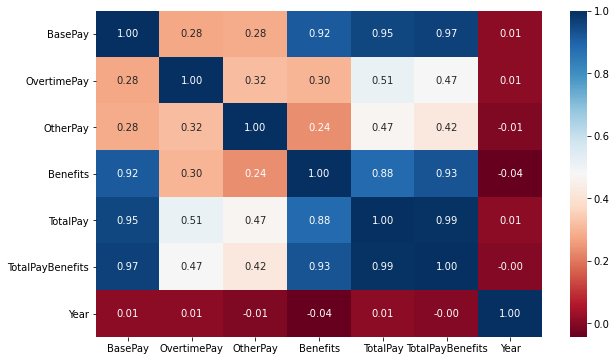

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), cmap='RdBu', annot=True, fmt=".2f");

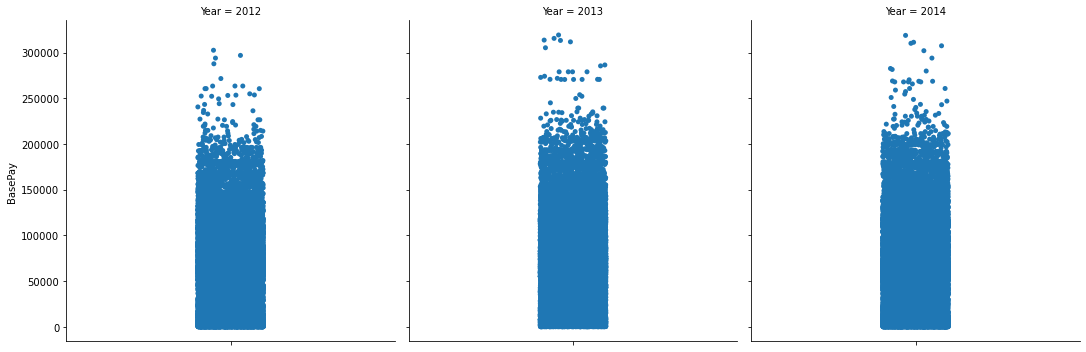

In [11]:
# BasePay over the years
# data.groupby('Year').mean()['BasePay']
sns.catplot(y='BasePay', col='Year', data=data);

In [12]:
# most famous jobs
data['JobTitle'].value_counts().head()

Transit Operator                6975
Special Nurse                   4381
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Name: JobTitle, dtype: int64

In [13]:
# number of people having chief in their name
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False
sum(data['JobTitle'].apply(lambda x: chief_string(x)))

420

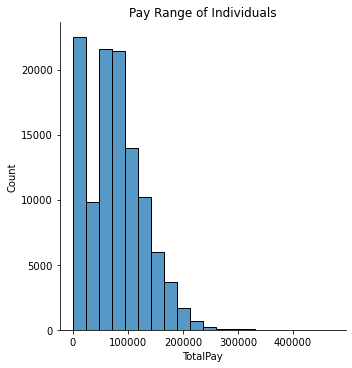

In [14]:
sns.displot(data['TotalPay'], bins=20, kde=False).set(title="Pay Range of Individuals");

### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>